<a href="https://colab.research.google.com/github/hcgalvan/labodedatos/blob/main/Ejercitacion_3_Galvan_Hugo_Cesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO

Tercera ejercitación de Laboratorio de Datos (1er cuatrimestre 2021)

De: Hugo César Galván

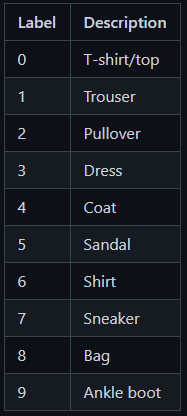


# Obtener datos

Utilizo el código de carga de datos, recomendado por cátedra

In [ ]:
# Librerias generales y montaje del drive
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt 
import numpy as np 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.datasets import mnist,fashion_mnist

(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()  # cargo los dataset de entrenamiento y testeo

# reshapeamos para obtener un vector de 784 elementos (features) por cada imagen (samples)
X_train = X_train_raw.reshape(60000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones
X_test = X_test_raw.reshape(10000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones

X_train = X_train.astype('float32') # transformamos el tipo de datos a "float32"
X_test = X_test.astype('float32') # transformamos el tipo de datos a "float32"

# normalizamos por el maximo valor que pueden tener los pixels para que los valores queden entre 0 y 1
X_train = X_train/255.0
X_test = X_test/255.0

# print the final input shape ready for training
print("Matriz de entrenamiento shape", X_train.shape)
print("Matriz de testeo shape", X_test.shape)

Matriz de entrenamiento shape (60000, 784)
Matriz de testeo shape (10000, 784)


# **Primer paso**: Hacer PCA.

 Hacer PCA sobre la matrix de datos de entrenamiento.

In [ ]:
# importamos las librerías usuales de python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importamos los algoritmos de clusterizacion a utilizar en esta notebook
from sklearn.cluster import KMeans                    # K-means

In [ ]:
# Clase para realizar componentes principales
from sklearn.decomposition import PCA

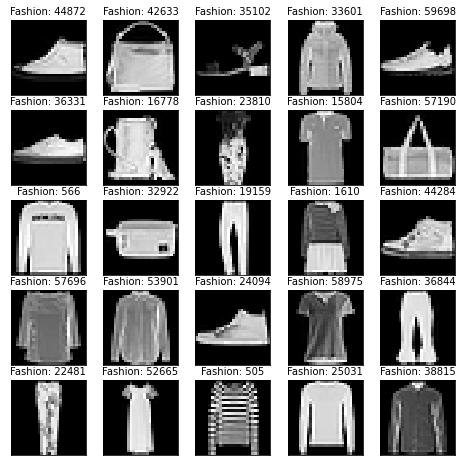

In [ ]:
# Ploteo 25 imagenes al azar
fig = plt.figure(figsize = (8,8)) # seteo el tamano de la figura
for i in range(25):
    j = np.random.randint(0, X_train.shape[0]) # en cada iteracion elijo un numero random entre 0 y la longitud de train_raw 
    plt.subplot(5,5,i+1) # Voy a tener una matriz de 5x5 subplots y voy llenando en la iteracion i-esima el subplot i+1
    plt.imshow(X_train[j,:].reshape(28,28), interpolation='none', cmap="gray") # plotea una imagen random, pues es la imagen j-esima del set de entrenamiento, en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
    plt.title("Fashion: {}".format(j), fontsize = 10) # pongo el titulo a los plots con el identificador unico de la persona 
    plt.xticks([]) # le saco los ticks en el eje X
    plt.yticks([]) # le saco los ticks en el eje Y
plt.show()

In [ ]:
# Creación del modelo de PCA con 100 componentes
pca = PCA(n_components = 100)
# Ajuste y transformación de los datos
pca.fit(X_train)
#No hace falta escalear las variables ya que todos los píxeles tienen el mismo rango
X_pca = pca.transform(X_train)
print('Dimensiones de la matriz en componentes principales: {}'.format(X_pca.shape))
print(X_pca)

Dimensiones de la matriz en componentes principales: (60000, 100)
[[-0.48667502  6.4041243  -4.7488623  ... -0.1459385  -0.04851873
   0.12153634]
 [ 5.520857   -1.7712381  -1.0233225  ...  0.21483779  0.03094598
   0.12853384]
 [-2.8471448  -4.3210225   0.41660154 ...  0.09964385 -0.07031409
   0.03756747]
 ...
 [ 3.3632913  -4.6284866  -2.0416298  ...  0.17027165 -0.34664312
  -0.16430572]
 [-3.1670082  -2.279379    1.88392    ... -0.03045261  0.11416267
  -0.27860948]
 [-7.1206837  -0.46966702  1.8391898  ...  0.30859783 -0.16459462
   0.01636378]]


# **Segundo paso**: Obtener y plotear

Obtener y plotear la varianza explicada por cada componente y la varianza explicada acumulada vs. número de componentes.

Text(0.5, 0, 'Cantidad de componentes principales')

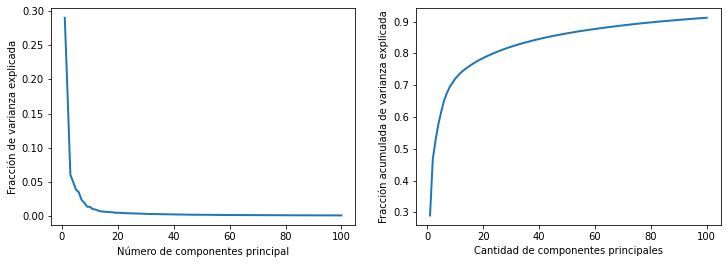

In [ ]:
# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '-', linewidth = 2)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componentes principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '-', linewidth = 2)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

# **Tercer paso**: Visualizar

Visualizar las primeros cinco componentes en orden de varianza explicada

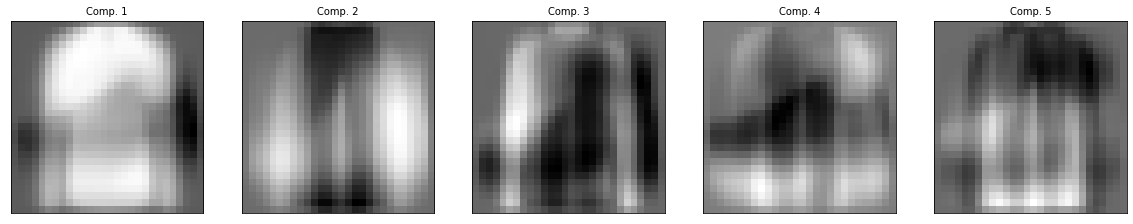

In [ ]:
fig, ax = plt.subplots(1, 5, figsize = (20, 20)) # seteo el tamano de la figura

# Hacemos un loop sobre las primeras 5 componentes
for pc in range(5):

  # Ploteo de la fashion reconstruida con el mismo código de antes
  ax[pc].imshow(pca.components_[pc].reshape(28, 28), interpolation='none', cmap="gray") # plotea la image dada por pc-componente principal en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
  
  ax[pc].set_title("Comp. {}".format(pc + 1), fontsize = 10) # pongo el titulo a los plots con el componente 
  
  ax[pc].set_xticks([]) # le saco los ticks en el eje X
  ax[pc].set_yticks([]) # le saco los ticks en el eje Y

plt.show()

# **Cuarto paso**: Elegir algunas de las imágenes y reconstruir

Elegir algunas de las imágenes al azar y mostrar la reconstrucción obtenida usando 2, 10, 25, 50 y 100 componentes.

[17673 40061 29199 50496 28017]


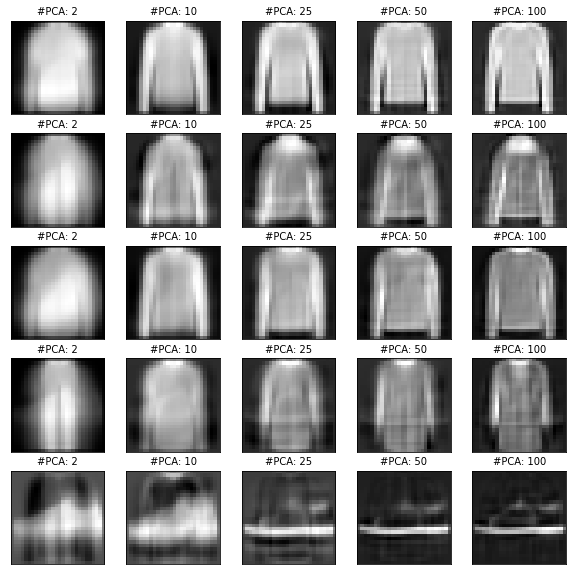

In [ ]:
#Imagenes
np.random.seed(seed=10)
ids = np.random.randint(0, X_train.shape[0]+1, 5)
print( ids )
fig, ax = plt.subplots(5, 5, figsize = (10, 10)) # seteo el tamano de la figura

fig_index = 0 # Indice para indicar donde hacer la figura

# Recorremos distinta cantidad de componentes
for i in ids:
  for p in [2, 10, 25, 50, 100]:
    # Creación del modelo de PCA con p componentes
    pca = PCA(n_components = p)
  
    # Ajuste y transformación de los datos
    pca.fit(X_train)
    X_pca = pca.transform(X_train)
  
    # Reconstrucción de la figura fashion desde el espacio reducido!!!
    X_r = pca.inverse_transform(X_pca)
  
    #Varianza explicada
    var_acumulada = np.cumsum(pca.explained_variance_ratio_)

    # Ploteo de fashion reconstruida con el mismo código de antes
    plt.subplot(5, 5, fig_index+1) 
    plt.imshow(X_r[i, :].reshape(28, 28), interpolation='none', cmap="gray") # plotea la imagen de índice fashionid en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
    plt.title("#PCA: {}".format(p, round(var_acumulada[p-1]*100,2)), fontsize = 10) # pongo el titulo a los plots con el identificador unico de la persona 
  
    plt.xticks([]) # le saco los ticks en el eje X
    plt.yticks([]) # le saco los ticks en el eje Y
    fig_index += 1
plt.show()


# **Quinto paso**: Visualizar datos en espacio de dimensión reducida

Visualizar los datos en un espacio de dimensión reducida formado por la 1era vs. la 2da componentes principales, usando scatterplot.

Text(0, 0.5, 'Segunda componente principal')

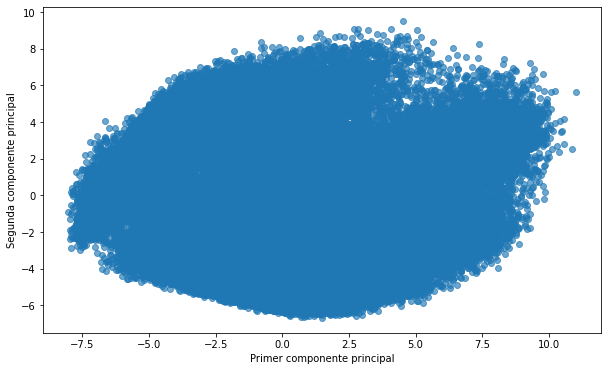

In [ ]:
# Matriz de fashion en el espacio de componentes principales
# Simplemente la matriz traspuesta de las componentes principales en el espacio de fashion
fashion_pc = pca.components_.T
# Graficamos los datos
fig, ax = plt.subplots(figsize = (10, 6))

# Hacemos un scatter de los datos en las dos primeras componentes
ax.scatter(X_pca[:,0], X_pca[:,1], alpha = 0.65)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

# **Sexto paso**: Hacer k-means sobre datos y visualizar algunos

Hacer k-means con k=2 sobre los datos del espacio 2D formado por la primera y segunda componente principal. Visualizar algunos ejemplos correspondientes a cada uno de los clusters para entender a dónde fue a parar cada tipo de prenda en los clusters.

In [ ]:
import seaborn as sbn # Herramienta complementaria de visualización https://seaborn.pydata.org/

In [ ]:
# Creación del modelo de PCA con 2 componentes
pca = PCA(n_components = 2)

# Ajuste y transformación de los datos
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [ ]:
X_pca.shape # Control de datos

(60000, 2)

In [ ]:
# Creación del modelo KMeans con k = 2
kmeans = KMeans(n_clusters=2)

# Ajuste del modelo a los datos reducidos en componentes principales
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Nos fijamos las etiquetas asignadas a las primeras 10 muestras y los counts que recibió cada una
np.unique(kmeans.labels_[:10], return_counts=True) 

(array([0, 1], dtype=int32), array([5, 5]))

ind0 = np.nonzero(y_train==0)[0]                                    # los índices correspondientes a la i-ésima etiqueta 
ind1 = np.nonzero(y_train==1)[0]
lista_O = [avg_marihuana[4], avg_no_marihuana[4],avg_prescripcion[4]]


datos = {'Extroversion':lista_E, 'Agradabilidad':lista_A, 'Responsabilidad':lista_C, 'Neuroticismo':lista_N, 'Apertura':lista_O} # armo un diccionario donde las llaves son los nombres de las columnas (dimensiones de personalidad) y ahi pongo los promedios para cada una de ellas 
indice = ['Marihuana', 'No marihuana', 'Prescripcion'] # armo el indice del dataframe, que representa a los tres grupos 

y_train = kmeans.labels_
cat = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
cat0 = ['Sandal', 'Sneaker', 'Bag', 'Ankle boot']
cat00 = [5, 7, 8, 9]
cat1 = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Shirt']
cat11 = [0, 1, 2, 3, 4, 6]


plt.figure()
sns.histplot(data=X_pca, x="1_neuroticism", hue="grupo", stat="count", common_norm=False)

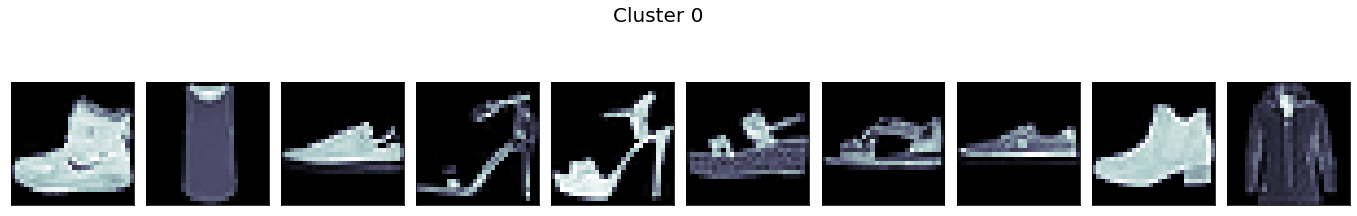

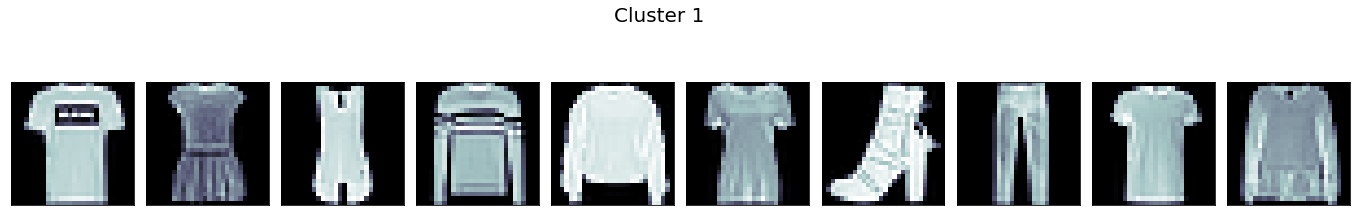

In [ ]:
# Mostrar el resultado final
labels = kmeans.labels_

# Iniciamos un for con k=2 iteraciones
for i in range(2):
    index = np.nonzero(labels==i)[0]                                    # los índices correspondientes a la i-ésima etiqueta 
    num = 10
    this_fashion = X_train[index].reshape(len(index),28,28)             # reshapeamos los samples del i-ésimo cluster para que tenga el formato de una imagen de (64,64) pixeles
    fig, axes = plt.subplots(1, num, figsize=(24, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(this_fashion[i], cmap='bone')

# **Séptimo paso**: Entrenar un modelo KNN

Usando los ids del clustering como etiquetas, entrenar un modelo KNN (K=5) usando los datos de entrenamiento (con todos los features, no solo las primeras dos componentes principales).

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from random import shuffle

In [ ]:
y_train = kmeans.labels_ # El resultado de kmeans con k=2 lo envío a y_train


In [ ]:
print(y_train, np.arange(len(y_train)))

[0 1 0 ... 1 0 0] [    0     1     2 ... 59997 59998 59999]


In [ ]:
ind0 = np.nonzero(y_train==0)[0]                                    # los índices correspondientes a la i-ésima etiqueta 
ind1 = np.nonzero(y_train==1)[0]                                    # los índices correspondientes a la i-ésima etiqueta 
num0 = len(ind0)
num1 = len(ind1) 
print(num0, num1, ind0, ind1, y_train)

28254 31746 [    0     2     6 ... 59995 59998 59999] [    1     3     4 ... 59994 59996 59997] [0 1 0 ... 1 0 0]


In [ ]:
acc = [] # donde van a ir a parar las accuracies
indices = np.arange(len(y_train)) # vector de indices

clf = KNeighborsClassifier(n_neighbors=5) # clasificador
clf.fit(X_train, y_train) # Ajuste del clasificador, una sola vez

for n in np.arange(0,10): # itero 
  print(n) 
  shuffle(indices) # permuto el vector de indices
  X_KNN = X_train[indices[0:100],:] # los primeros 100 del vector de indices
  y_KNN = y_train[indices[0:100]]

  y_pred = clf.predict(X_KNN) # predigo etiquetas
  accuracy =  accuracy_score(y_pred,y_KNN) # acuraccy
  acc.append(accuracy) # guardo

print('Accuracy promedio:', np.mean(accuracy)) # el promedio

0
1
2
3
4
5
6
7
8
9
Accuracy promedio: 1.0


In [ ]:
exitos = indices[0:100][y_pred == y_KNN] # los indices correspondientes a los casos en que le pegamos a la etiqueta
fracasos = indices[0:100][np.logical_not(y_pred == y_KNN)]# los indices correspondientes a los casos en que  fallamos la etiqueta
n=exitos[93] # elijo uno de los exitos
print (n)


58302


# **Octavo paso**: Armar un nuevo vector de etiquetas

Armar un nuevo vector de etiquetas que reemplace a y_test, y tenga 0 donde pensamos que ese ejemplo iría al cluster 0 y 1 donde pensamos que iría al cluster 1 (los clusters que obtuvimos con k-means).

En y_test te viene una lista de las labels [9, 2, 1, ...]. Tenés que definir dos clusters (a mano, qe a vos se te ocurran qe tengan sentido) y luego mapeás y_test a otra lista donde tenga 0 si pertenece al primer cluster, y 1 si pertenece al otro

In [ ]:
y_test_nuevo = []
for i in range(len(y_test)):
  if y_test[i] in [5, 7, 8, 9]:
    y_test_nuevo += [0]
  else:
    y_test_nuevo += [1]

y_test_nuevo = np.array(y_test_nuevo)

In [ ]:
print(y_test_nuevo)
print(y_test)

[0 1 1 ... 0 1 0]
[9 2 1 ... 8 1 5]


# **Noveno paso**: Aplicar modelo KNN a datos del dataset de evaluación

Ahora aplicar el modelo KNN a datos del dataset de evaluación. Hacerlo con los primeros 1000 (sino puede tardar mucho). Usando las ids obtenidas mediante el procedimiento del paso anterior, y las predichas por KNN, construir una matriz de confusión para evaluar la performance del clasificador KNN.

In [ ]:
from sklearn.metrics import confusion_matrix # matriz de confusion

In [ ]:
acc = [] # donde van a ir a parar las accuracies
indices = np.arange(len(y_test_nuevo)) # vector de indices de los obtenidos en paso anterior

clf = KNeighborsClassifier(n_neighbors=5) # clasificador
clf.fit(X_test, y_test_nuevo) # # Ajuste del clasificador, una sola vez

for n in np.arange(0,10): # itero 

  # print(n)  para los ansiosos
  shuffle(indices) # permuto el vector de indices
  X_pred_KNN = X_test[indices[0:1000],:] # los primeros 1000 del vector de indices
  y_pred_KNN = y_test_nuevo[indices[0:1000]]

  y_pred = clf.predict(X_pred_KNN) # predigo etiquetas
  accuracy =  accuracy_score(y_pred,y_pred_KNN) # acuraccy
  acc.append(accuracy) # guardo

print('Accuracy promedio:', np.mean(accuracy)) # el promedio

0
1
2
3
4
5
6
7
8
9
Accuracy promedio: 0.99


In [ ]:
print(y_pred.shape, y_pred_KNN.shape)

(1000,) (1000,)


In [ ]:
cm = confusion_matrix(y_pred, y_pred_KNN) # primera entrada son las etiquetas predichas, segunda son las reales
print(cm)
#donde: y_pred_KNN son las 1000 predicciones hechas por KNN, y_test_reducido es un array (1000) de unos y ceros según el cluster al que corresponda la etiqueta. 

[[386   4]
 [  6 604]]
